# Prática

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**



## Visualização e exploração de dados

### Associação entre variáveis

Considere os dados de 10 mil clientes de um banco no arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.


Analise as possíveis associações entre o sexo, idade, empresa, salário, saldo em conta corrente, saldo em conta poupança, saldo em investimento e devedor no cartão com a variável Inadimplente. Teste outras combinações, por exemplo incluindo a empresa nos gráficos anteriores. Adicione novos elementos utilizando a ajuda das funções. Interprete os resultados. 

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

pkgdir = '/hdd/MBA/ECD/Data'

# Dados banco - Leitura dos dados
dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0)

dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
75928,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
52921,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
8387,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
54522,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
45397,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


### Associação entre sexo e inadimplência


In [2]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Sexo'])

tabela_dupla

Sexo,F,M
Inadimplente,,
0,3185,4354
1,1046,1415


In [3]:
tabela_dupla/tabela_dupla.sum()

Sexo,F,M
Inadimplente,,
0,0.752777,0.754724
1,0.247223,0.245276


### Associação entre idade e inadimplência

<AxesSubplot:xlabel='Inadimplente', ylabel='Idade'>

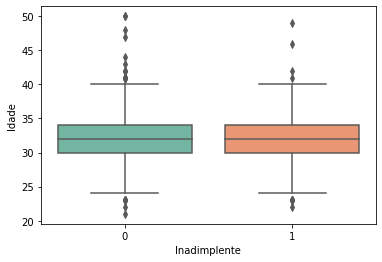

In [4]:
import seaborn as sns
sns.boxplot(y=dados["Idade"],x=dados["Inadimplente"], palette="Set2")

### Associação entre empresa e inadimplência

In [5]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Empresa'], margins=True, margins_name='Total')

tabela_dupla

Empresa,Autônomo,Privada,Pública,Total
Inadimplente,,,,
0,832,4579,2128,7539
1,615,1524,322,2461
Total,1447,6103,2450,10000


In [6]:
tabela_dupla/tabela_dupla.sum()

Empresa,Autônomo,Privada,Pública,Total
Inadimplente,,,,
0,0.287491,0.375143,0.434286,0.37695
1,0.212509,0.124857,0.065714,0.12305
Total,0.500000,0.500000,0.500000,0.50000


In [7]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Inadimplente'], columns=dados['Empresa'], margins=False, margins_name='Total')

tabela_dupla

Empresa,Autônomo,Privada,Pública
Inadimplente,,,
0,832,4579,2128
1,615,1524,322


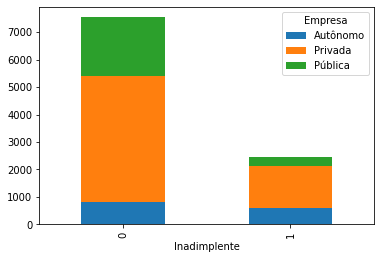

In [8]:
tabela_dupla.plot.bar(stacked=True)

plt.legend(title='Empresa')

plt.show()

### Associação entre salário e inadimplência

<AxesSubplot:xlabel='Inadimplente', ylabel='Salario'>

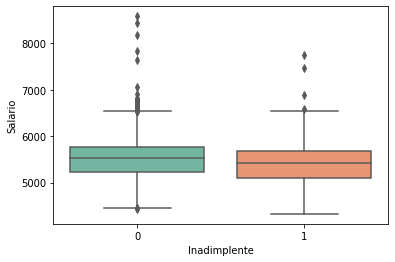

In [9]:
import seaborn as sns
sns.boxplot(y=dados["Salario"],x=dados["Inadimplente"], palette='Set2')

### Associação entre saldo em conta corrente e inadimplência

<AxesSubplot:xlabel='Inadimplente', ylabel='Saldo_cc'>

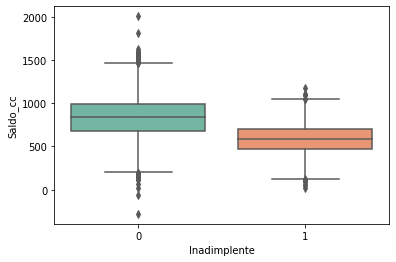

In [10]:
import seaborn as sns
sns.boxplot(y=dados["Saldo_cc"],x=dados["Inadimplente"], palette="Set2")

### Associação entre saldo em conta poupança e inadimplência

<AxesSubplot:xlabel='Inadimplente', ylabel='Saldo_poupança'>

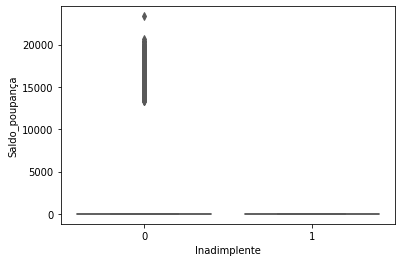

In [11]:
import seaborn as sns
sns.boxplot(y=dados["Saldo_poupança"],x=dados["Inadimplente"], palette="Set2")

### Associação entre devedor no cartão e inadimplência

<AxesSubplot:xlabel='Inadimplente', ylabel='Devedor_cartao'>

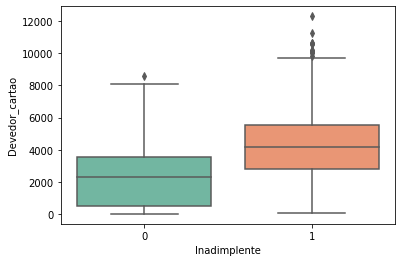

In [12]:
import seaborn as sns
sns.boxplot(y=dados["Devedor_cartao"],x=dados["Inadimplente"], palette="Set2")

<AxesSubplot:xlabel='Inadimplente', ylabel='Devedor_cartao'>

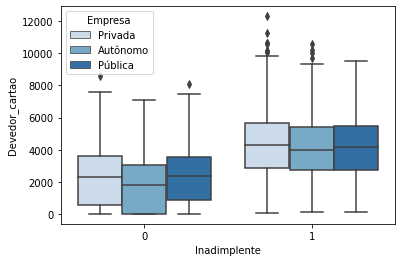

In [13]:
import seaborn as sns
sns.boxplot(y=dados["Devedor_cartao"],x=dados["Inadimplente"], hue=dados["Empresa"], palette="Blues")

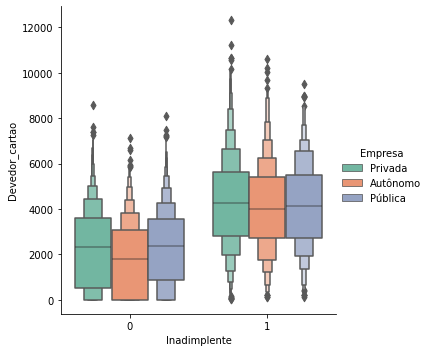

In [14]:
import seaborn as sns
sns.catplot(y="Devedor_cartao",x="Inadimplente", hue='Empresa', data=dados, kind='boxen', palette="Set2")

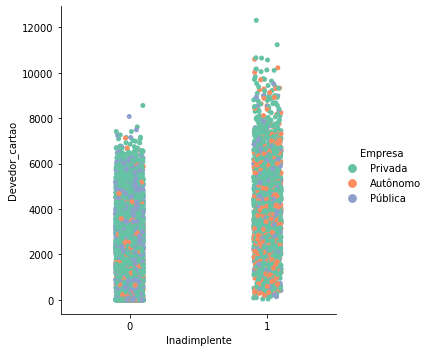

In [15]:
import seaborn as sns
sns.catplot(y="Devedor_cartao",x="Inadimplente", hue='Empresa', data=dados, kind='strip', palette="Set2")

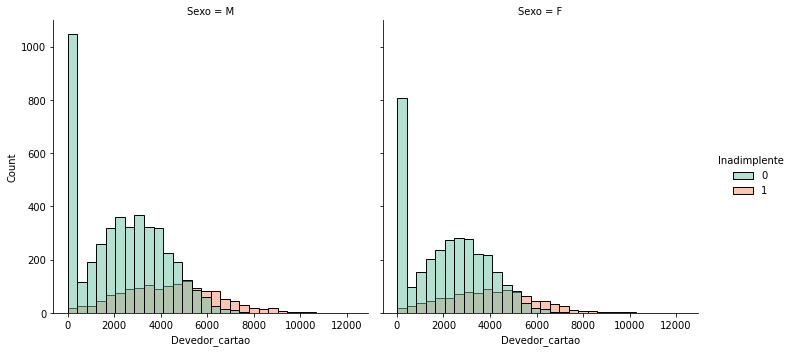

In [16]:
sns.displot(dados, x='Devedor_cartao', col='Sexo', hue='Inadimplente', bins=30, palette='Set2');


Como não fizemos análises inferenciais, não podemos concluir estatisticamente sobre as associações. Porém, com base nas análises de visualização e exploração de dados, parece existir associação entre saldo em conta corrente e inadimplência e tipo de empresa. A distribuição de dados no devedor de cartão parece ser distinta para os grupos definidos pela variável inadimplente.